In [1]:
import numpy as np # it is used for  numerical computing.
import pandas as pd # it is used for data manipulation and analysis tools for dataframe
import matplotlib.pyplot as plt #it is for visualization
import seaborn as sns # advance visualization tools (tools which is not in matplotlib) 
import os # it is used to interact with operating system
import warnings 
warnings.filterwarnings("ignore") #ignore not-essential warnings 

# Uploading The Dataset as ds

ds = pd.read_csv("C:\\Users\\DELL\\Downloads\\mobile\\Flipkart_Mobiles.csv")

In [3]:
ds.head()                    ## print top 5 rows of dataset

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [4]:
ds.info()                 ## to check general information of ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [5]:
ds.shape                       ## check the shape of ds.

(3114, 8)

In [6]:
ds.ndim                       ## check dimension of ds.

2

# Data cleaning and Transformation

In [7]:
a = list(ds)                  # a is assign as a list of attributes(attributes of ds).

In [8]:
print(a)                      # list of a(attributs of dataset).

['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating', 'Selling Price', 'Original Price']


In [9]:
num_a1 = ["Memory", "Storage"]                # num_a1-list contain only 2 attributes
num_a2 = ["Memory", "Storage", "Rating", "Selling Price", "Original Price"]   # num_a2-list contain 5 attributes
cat_a =  ["Brand", "Model", "Color"]           # cat_a-list contain mainly object(categorical data) type attributes(3)

### Removing and Changing the un-wanted strings in dataset

In [10]:
ds["Storage"].value_counts() # get different types values counts in 'Storage' attribute

Storage
64 GB                    774
128 GB                   764
32 GB                    555
16 GB                    322
256 GB                   240
8 GB                     133
512 GB                    67
4 GB                      56
2 MB                      45
4 MB                      28
16 MB                     14
1 TB                      14
Expandable Upto 16 GB     12
128 MB                    12
Expandable Upto 32 GB     12
8 MB                       6
256 MB                     3
64 MB                      3
48 MB                      3
129 GB                     3
512 MB                     2
100 MB                     2
130 GB                     2
10 MB                      1
140 MB                     1
153 MB                     1
Name: count, dtype: int64

In [11]:
ds["Memory"].value_counts()  # count of different values in "Memory" attribute.

Memory
4 GB      750
3 GB      498
6 GB      497
2 GB      390
8 GB      345
1 GB      193
4GB       137
12 GB      63
512 MB     46
4 MB       39
1.5 GB     29
16 MB      16
64 MB      15
8 MB       14
32 MB      14
768 MB      6
128 MB      4
10 MB       3
18 GB       2
16 GB       2
2 MB        2
46 MB       2
153 MB      1
32 GB       1
100 MB      1
30 MB       1
Name: count, dtype: int64

#### converting the rows data in single formate by removing unwanted string like gb, mb, tb...

In [12]:
# Removing GB in num_a1 list ["Storage" and "Memory"]
num_col = ds.loc[:, num_a1]
for col in list (num_col):
    c = 0
    for i in num_col.loc[:, col]:
        if isinstance(i, str):
            if ("GB" in i):
                num_col.loc[c, col] = i.replace("GB", '')
        c = c+1
            

In [13]:
# Removing MB in num_a1 list ["Storage" and "Memory"]
MBS = []  # null list for storing data of Storage attribute .
MBM = []  # null list for storing data of Memory attribute .
for col in list(num_col):
    c =0
    for i in num_col.loc[:, col]:
        if isinstance(i, str):
            if ("MB" in i and col=="Memory"):
                num_col.loc[c, col] = i.replace("MB", '')
                MBM.append(c)
            elif ("MB" in i and col == "Storage"):
                num_col.loc[c,col] = i.replace("MB",'')
                MBS.append(c)
        c = c+1

In [14]:
# Removing TB in num_a1 list ["Storage" and "Memory"]
TBS = [] # null list for storing data of Storage attribute .
TBM = [] # null list for storing data of Memory attribute .
for col in list(num_col):
    c = 0
    for i in num_col.loc[:, col]:
        if isinstance(i,str):
            if ("TB" in i and col == "Memory"):
                num_col.loc[c,col] = i.replace("TB",'')
                TBM.append(c)
            elif ("TB" in i and col=="Storage"):
                num_col.loc[c, col] = i.replace("TB",'')
                TBS.append(c)
        c = c+1

In [15]:
for col in list(num_col):
    c = 0
    for i in num_col.loc[:, col]:
        if isinstance(i, str):
            if("Expandable Upto 16" in  i):
                num_col.loc[c,col] = i.replace("Expandable Upto 16" , "16") # removing "Expandable Upto 16" by 16 
            elif("Expandable Upto 32" in i):
                num_col.loc[c,col] = i.replace("Expandable Upto 32", "32")  # removing "Expandable Upto 32" by 32 
        c = c+1
        

In [16]:
## Removing blank space after model names
model_col= ds.loc[:, "Model"] 
c=0
for i in model_col:
    model_col.loc[c] = i.rstrip()
    c = c+1
ds["Model"] = model_col

In [17]:
# convert string to float datatype of 'Storage' and 'Memory'
for col in list(num_col):
    num_col[col]= num_col[col].astype(float)
    ds[col] = num_col[col]

In [18]:
ds.info() # general information after preprocessing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   float64
 4   Storage         3075 non-null   float64
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 194.8+ KB


In [19]:
ds["Memory"].value_counts()

Memory
4.0      926
3.0      498
6.0      497
2.0      392
8.0      359
1.0      193
12.0      63
512.0     46
1.5       29
16.0      18
64.0      15
32.0      15
768.0      6
128.0      4
10.0       3
18.0       2
46.0       2
153.0      1
100.0      1
30.0       1
Name: count, dtype: int64

In [20]:
num_col = ds.loc[:, num_a2]
for col in list(num_col):
    num_col.loc[num_col[col]==0, col]= np.nan
    ds[col]= num_col[col]

In [21]:
ds.info() # recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   float64
 4   Storage         3075 non-null   float64
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   float64
 7   Original Price  3114 non-null   float64
dtypes: float64(5), object(3)
memory usage: 194.8+ KB


In [22]:
cat_col = ds.loc[:, cat_a]
for col in list(cat_col):
    c = 0
    for i in cat_col[col]:
        if (i.isspace()==True):
            cat_col.loc[c, col] = np.nan
        c = c+1
    ds[col] = cat_col[col]

In [23]:
cat_col.info()  # recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   3114 non-null   object
 1   Model   3114 non-null   object
 2   Color   3114 non-null   object
dtypes: object(3)
memory usage: 73.1+ KB


In [24]:
# converting MB to GB [GB=MB/(2**10)] upto 3 decimal place
for index in MBS:
    ds.loc[index, 'Storage'] = np.round(ds.loc[index, 'Storage'] / np.power(2, 10), 3)
for index in MBM:
    ds.loc[index, 'Memory'] = np.round(ds.loc[index, 'Memory'] / np.power(2, 10), 3)

In [25]:
# converting TB to GB [(GB) = (TB)*(2**10)] upto 3 decimal place
for index in TBS:
    ds.loc[index, 'Storage'] = np.round(ds.loc[index, 'Storage'] * np.power(2, 10), 3)
for index in TBM:
    ds.loc[index, 'Memory'] = np.round(ds.loc[index, 'Memory'] * np.power(2, 10), 3)

In [26]:
ds.isnull().sum() # to check for null values

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

### doing Simple-Imputer to remove null value by specific statistical value

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")  # using mean value to replace null values
ds.loc[:, ["Memory","Storage","Rating"]] = imputer.fit_transform(ds.loc[:, ["Memory", "Storage", "Rating"]])

In [28]:
ds.isnull().sum() ## recheck for null values

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

### Understand the data and pattern by using Visualization ]

### Histrogram visualization 

In [29]:
ds["Storage"].value_counts()

Storage
64.000000      774
128.000000     764
32.000000      567
16.000000      334
256.000000     240
8.000000       133
512.000000      67
4.000000        56
0.002000        45
91.979038       39
0.004000        28
0.016000        14
1024.000000     14
0.125000        12
0.008000         6
0.047000         3
0.250000         3
0.062000         3
129.000000       3
0.500000         2
0.098000         2
130.000000       2
0.010000         1
0.137000         1
0.149000         1
Name: count, dtype: int64

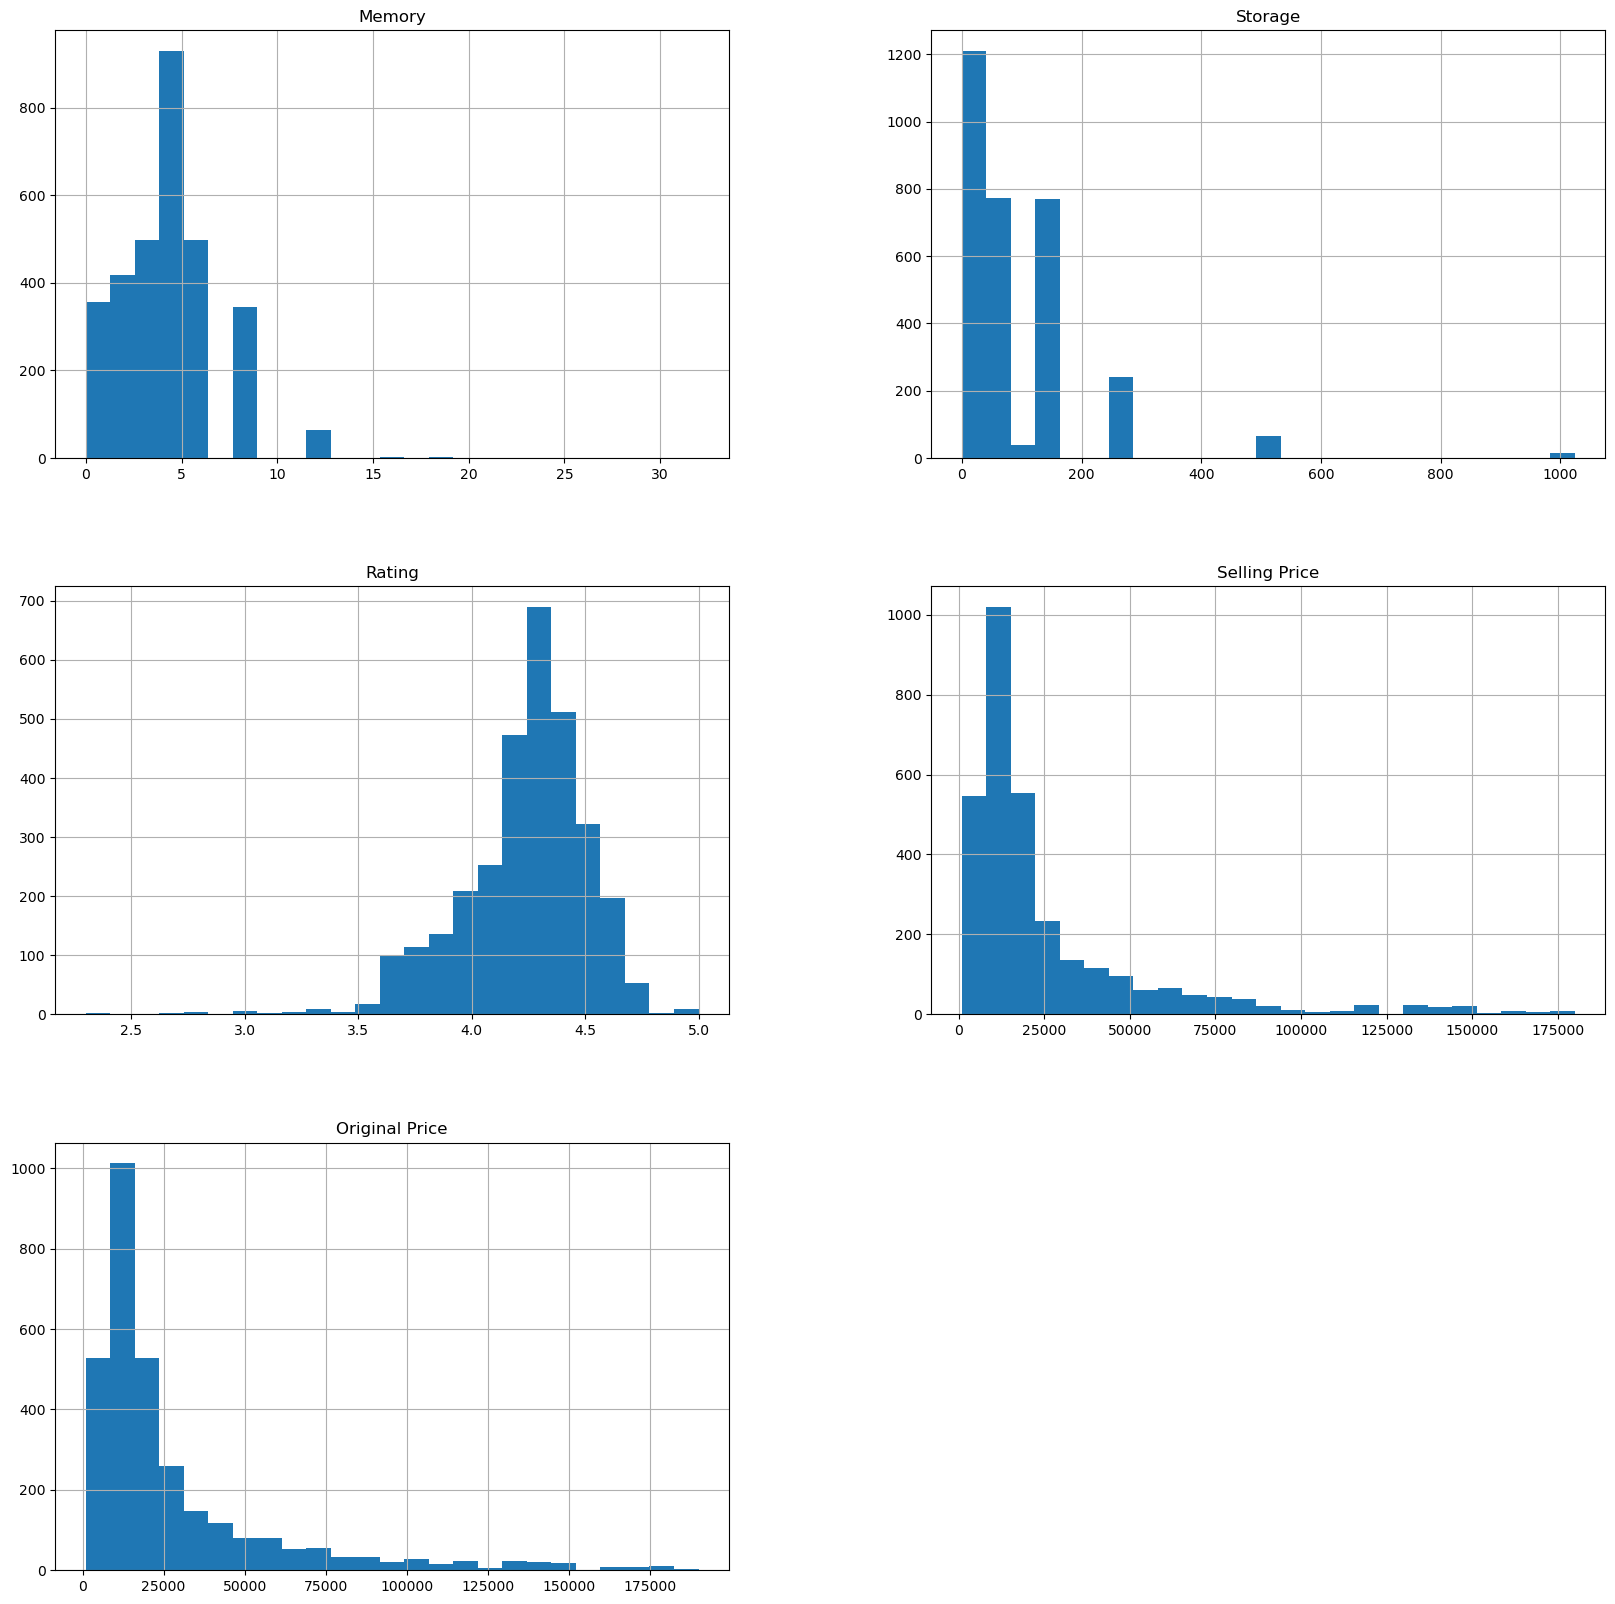

In [30]:
ds.hist(bins = 25, figsize = (20,20))
plt.show()

In [31]:
ds.describe() # statistical brief-summary

,Memory,Storage,Rating,Selling Price,Original Price
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.131159,91.979038,4.243098,26436.625562,28333.473025
std,2.491500,111.070969,0.265625,30066.892622,31525.599889
min,0.002000,0.002000,2.300000,1000.000000,1000.000000
25%,3.000000,32.000000,4.100000,9990.000000,10030.250000
50%,4.000000,64.000000,4.300000,15000.000000,16889.500000
75%,6.000000,128.000000,4.400000,28999.000000,31500.000000
max,32.000000,1024.000000,5.000000,179900.000000,189999.000000


In [32]:
ds.info()  # final recheck the general infromation after performing all neccessary preproccessing techniques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3114 non-null   float64
 4   Storage         3114 non-null   float64
 5   Rating          3114 non-null   float64
 6   Selling Price   3114 non-null   float64
 7   Original Price  3114 non-null   float64
dtypes: float64(5), object(3)
memory usage: 194.8+ KB


### Visualization of pair plot using seaborn library.

it is used for more deep visualization by using different different plot in single screen for deep knowladege

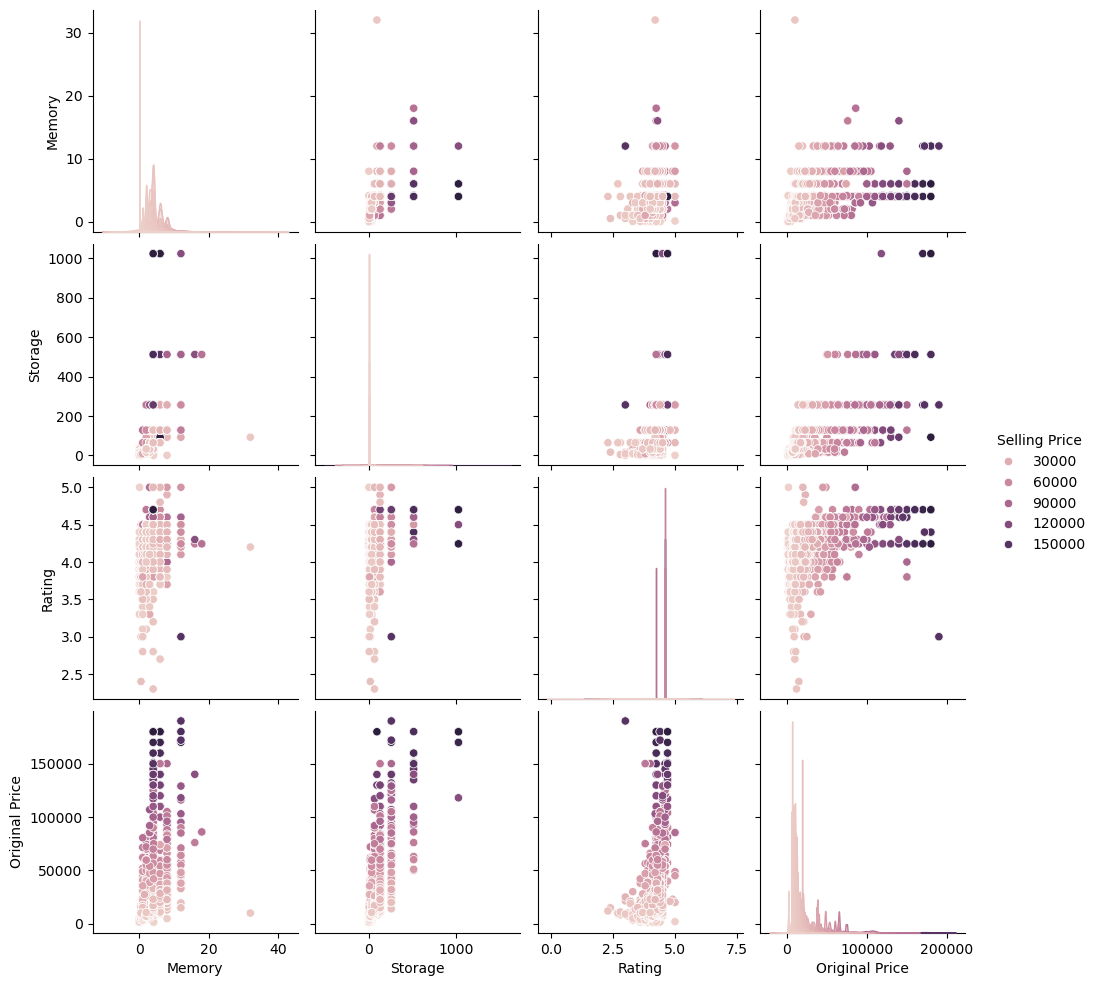

In [33]:
sns.pairplot(ds, kind = "scatter", hue = "Selling Price")
plt.show()

In [34]:
summary_cat = ds.describe(include = "O") # complete summary of dataset(ds)
summary_cat

,Brand,Model,Color
count,3114,3114,3114
unique,17,899,639
top,SAMSUNG,iPhone 13 Pro Max,Black
freq,719,37,489


In [35]:
summary_num = ds.describe()        ## summary of only numerical attributes
summary_num

,Memory,Storage,Rating,Selling Price,Original Price
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.131159,91.979038,4.243098,26436.625562,28333.473025
std,2.491500,111.070969,0.265625,30066.892622,31525.599889
min,0.002000,0.002000,2.300000,1000.000000,1000.000000
25%,3.000000,32.000000,4.100000,9990.000000,10030.250000
50%,4.000000,64.000000,4.300000,15000.000000,16889.500000
75%,6.000000,128.000000,4.400000,28999.000000,31500.000000
max,32.000000,1024.000000,5.000000,179900.000000,189999.000000


In [36]:
## preform correlation- analysis(in nummeric data)
corre = summary_num.corr(method = 'pearson')
print(corre)

                  Memory   Storage    Rating  Selling Price  Original Price
Memory          1.000000  0.953326  0.999962      -0.222137       -0.224458
Storage         0.953326  1.000000  0.950667       0.082126        0.079731
Rating          0.999962  0.950667  1.000000      -0.230591       -0.232906
Selling Price  -0.222137  0.082126 -0.230591       1.000000        0.999960
Original Price -0.224458  0.079731 -0.232906       0.999960        1.000000


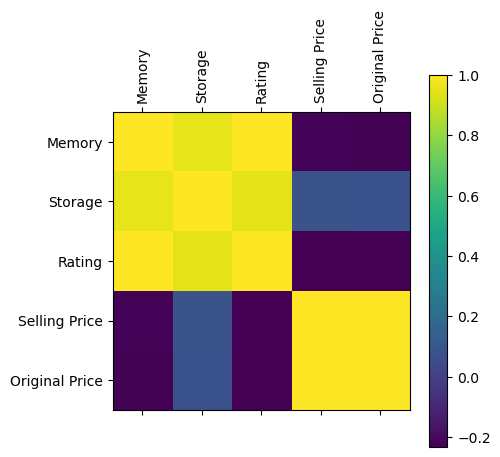

In [37]:
## visualize the correlation matric using matplotlib
plt.matshow(corre)
plt.xticks(range(len(corre.columns)),corre.columns, rotation = 90)
plt.yticks(range(len(corre.columns)),corre.columns)
plt.colorbar()
plt.show()

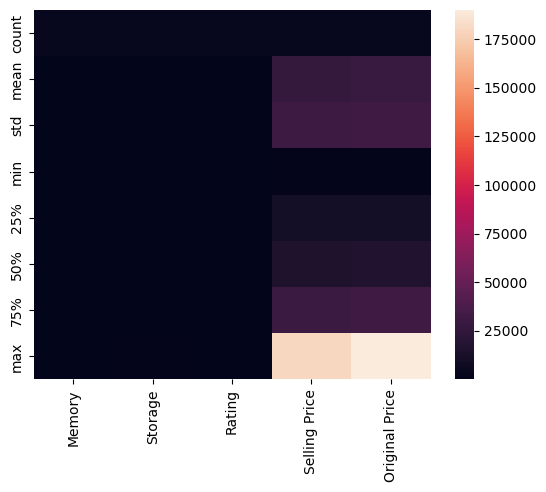

In [38]:
# plot heatmap using seaborn library
sns.heatmap(summary_num)
plt.show()

In [39]:
ds.shape # check final shape after the preproccessing

(3114, 8)

# Solving the problem (Questions........)

# Q. Which phone has the most sales?

In [40]:
Brand = ds["Brand"].value_counts()
Brand

Brand
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

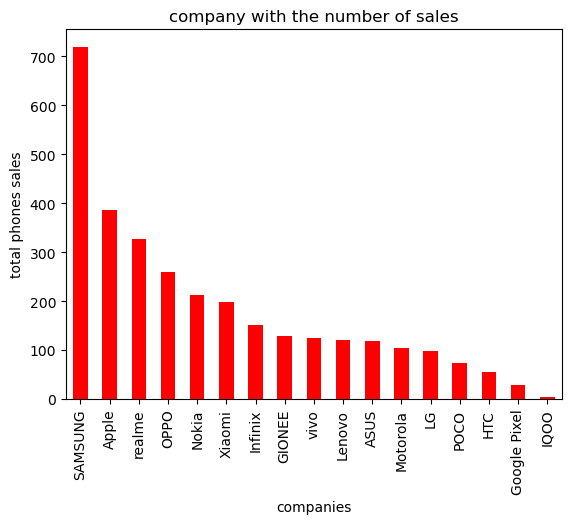

In [41]:
Brand.plot(kind = "bar", color = "red")
plt.xlabel("companies")
plt.ylabel("total phones sales")
plt.title("company with the number of sales")
plt.show()

# Q. What is the preference made by customers on basis of storage and memory?

In [42]:
Memory = ds["Memory"].value_counts()
Memory

Memory
4.000000     887
3.000000     498
6.000000     497
2.000000     390
8.000000     345
1.000000     193
12.000000     63
0.500000      46
4.131159      43
0.004000      39
1.500000      29
0.016000      16
0.062000      15
0.008000      14
0.031000      14
0.750000       6
0.125000       4
0.010000       3
18.000000      2
16.000000      2
0.002000       2
0.045000       2
0.149000       1
32.000000      1
0.098000       1
0.029000       1
Name: count, dtype: int64

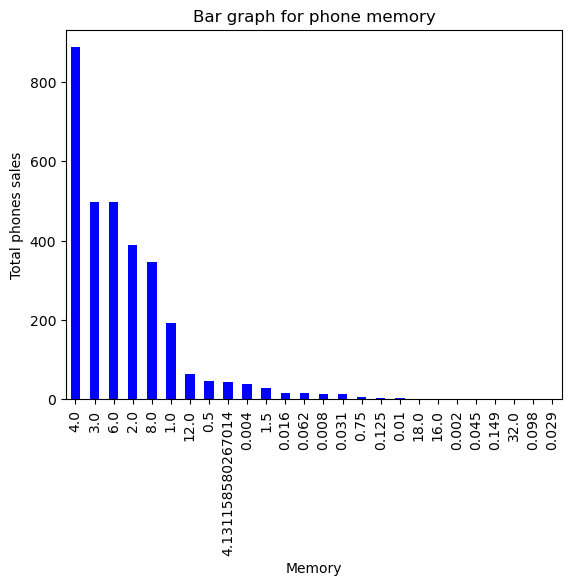

In [43]:
Memory.plot(kind = 'bar', color = 'blue')
plt.xlabel("Memory")
plt.ylabel("Total phones sales")
plt.title("Bar graph for phone memory")
plt.show()

In [44]:
Storage = ds["Storage"].value_counts()
Storage

Storage
64.000000      774
128.000000     764
32.000000      567
16.000000      334
256.000000     240
8.000000       133
512.000000      67
4.000000        56
0.002000        45
91.979038       39
0.004000        28
0.016000        14
1024.000000     14
0.125000        12
0.008000         6
0.047000         3
0.250000         3
0.062000         3
129.000000       3
0.500000         2
0.098000         2
130.000000       2
0.010000         1
0.137000         1
0.149000         1
Name: count, dtype: int64

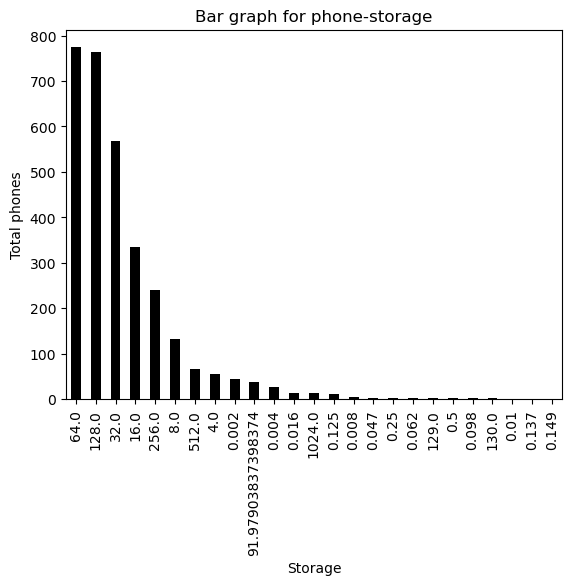

In [45]:
Storage.plot(kind = 'bar', color = 'black')
plt.xlabel("Storage")
plt.ylabel("Total phones")
plt.title("Bar graph for phone-storage")
plt.show()

In [46]:
print("Most preferred storage = ", (Storage.index.tolist()[0:5]), "GB")
print("Most preferred memory = ", (Memory.index.tolist()[0:10]), "GB RAM")

Most preferred storage =  [64.0, 128.0, 32.0, 16.0, 256.0] GB
Most preferred memory =  [4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 12.0, 0.5, 4.131158580267014, 0.004] GB RAM


# Q. Cost-wise/financially which company has the most sales?

In [47]:
ds["Brand"].value_counts()

Brand
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [48]:
s = ds.groupby("Brand")["Selling Price"].sum()

In [49]:
s

Brand
ASUS             2398576.0
Apple           31728412.0
GIONEE            920427.0
Google Pixel     1780364.0
HTC              1557291.0
IQOO              185950.0
Infinix          1674919.0
LG               1912995.0
Lenovo           1220145.0
Motorola         1717534.0
Nokia            2008304.0
OPPO             4825727.0
POCO             1248426.0
SAMSUNG         17469003.0
Xiaomi           3354498.0
realme           5361667.0
vivo             2959414.0
Name: Selling Price, dtype: float64

In [50]:
s.idxmax()


'Apple'

In [51]:
s.max()

31728412.0

<Axes: xlabel='Brand'>

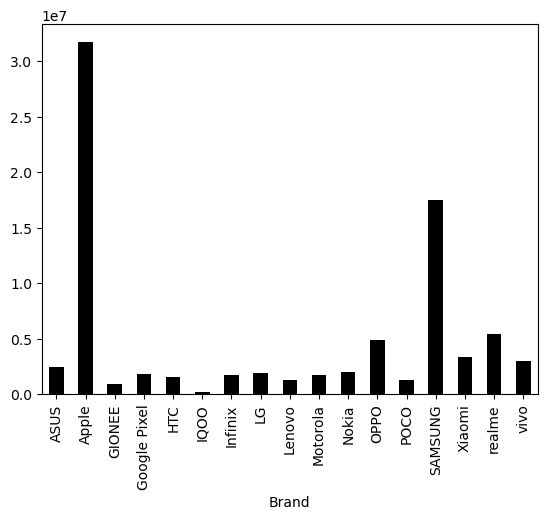

In [52]:
s.plot(kind = "bar", color = "black")

In [53]:
plt.show()

#### The phone with the highest total cost =  Apple
####  The highest total cost =  31728412.0

### Q. What is the market contribution of each company?

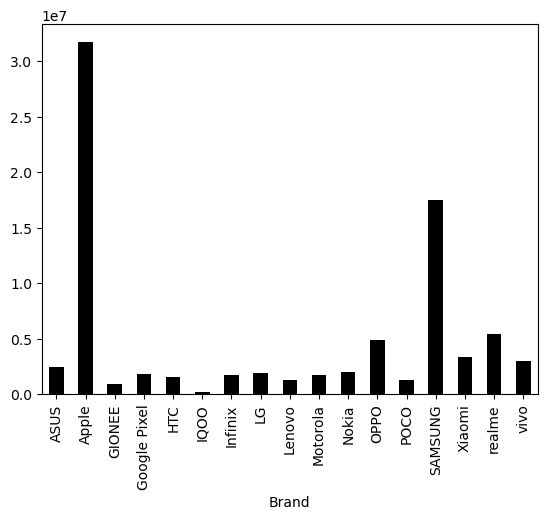

In [54]:
s.plot(kind = "bar", color = "black")
plt.show()

In [55]:
s

Brand
ASUS             2398576.0
Apple           31728412.0
GIONEE            920427.0
Google Pixel     1780364.0
HTC              1557291.0
IQOO              185950.0
Infinix          1674919.0
LG               1912995.0
Lenovo           1220145.0
Motorola         1717534.0
Nokia            2008304.0
OPPO             4825727.0
POCO             1248426.0
SAMSUNG         17469003.0
Xiaomi           3354498.0
realme           5361667.0
vivo             2959414.0
Name: Selling Price, dtype: float64

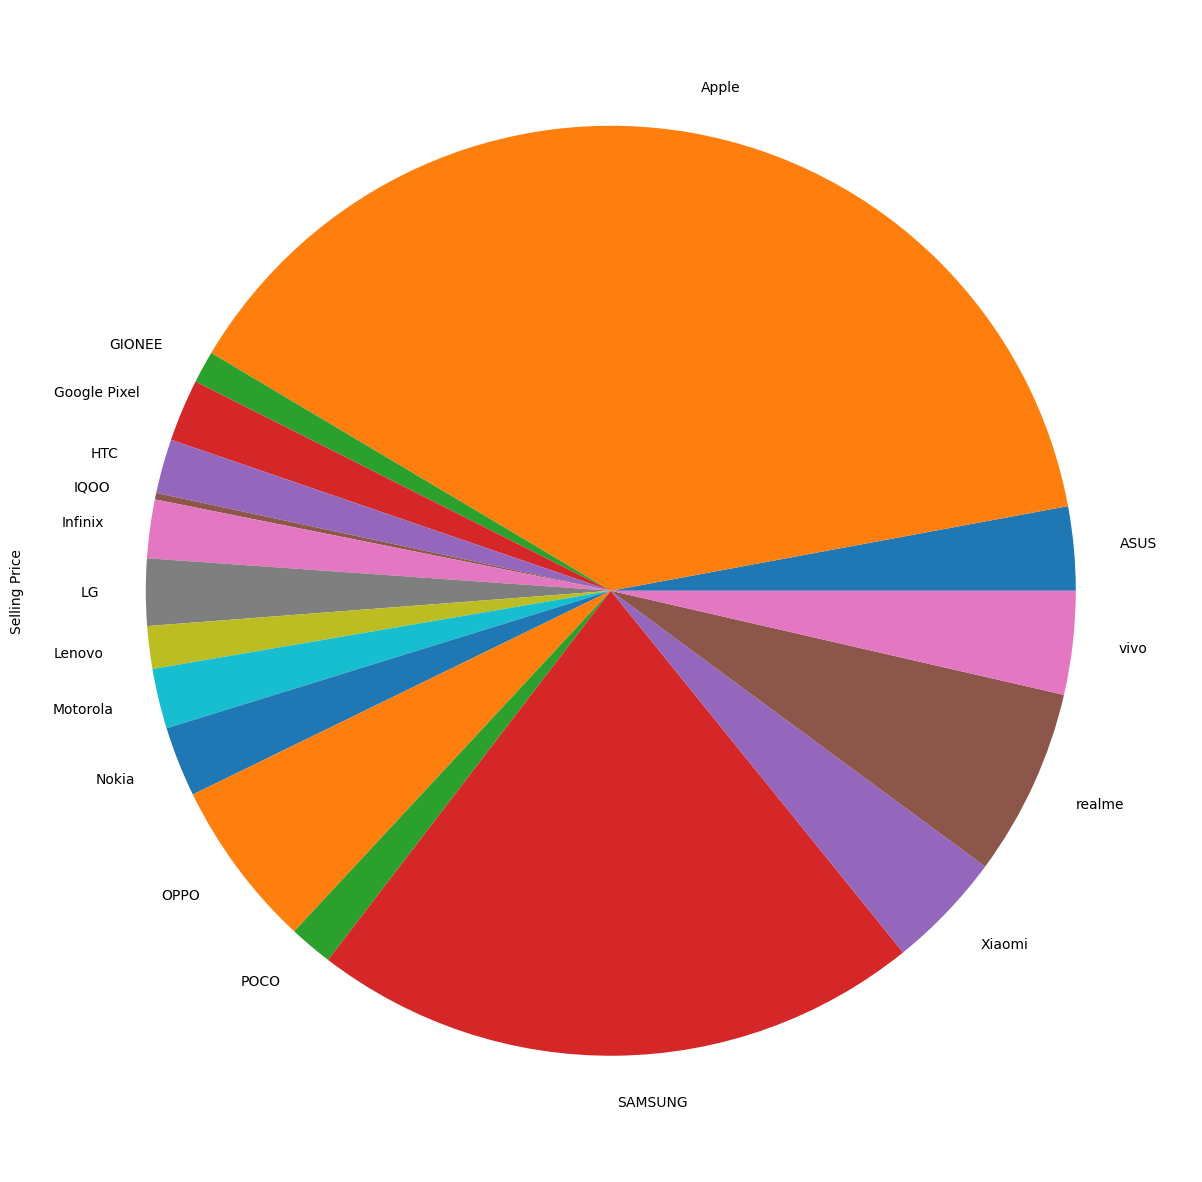

In [56]:
s.plot(kind = "pie", figsize=(15,55))
plt.show()

### Q. Which color has the most demand?


In [57]:
color = ds["Color"].value_counts()
color

Color
Black                489
Gold                 195
White                154
Blue                 146
Silver               104
                    ... 
Roman Black            1
Diamond Flare          1
Metallic Gray          1
Titanium Sapphire      1
Volcanic Grey          1
Name: count, Length: 639, dtype: int64

In [58]:

print(color.idxmax())

Black


#### Most Preferred Phone Color Is BLACK

### Q. What is the correlation between ratings and sale price?


In [59]:
corrr = summary_num.corr()

In [60]:
corrr["Rating"].sort_values(ascending = False)

Rating            1.000000
Memory            0.999962
Storage           0.950667
Selling Price    -0.230591
Original Price   -0.232906
Name: Rating, dtype: float64

In [61]:
corrr["Rating"]["Selling Price"]

-0.23059115372558345

<Axes: >

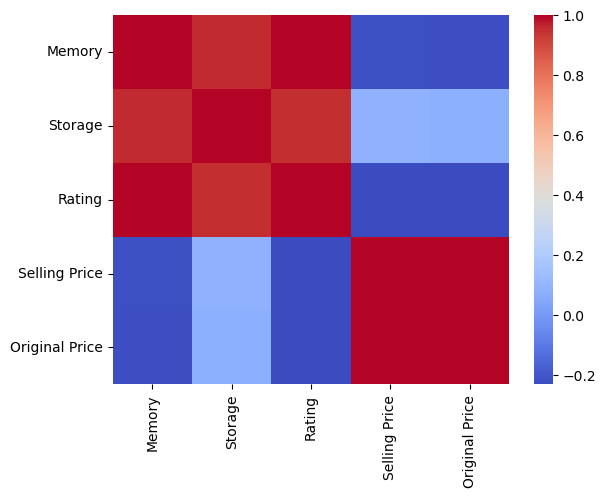

In [63]:
sns.heatmap(corrr, cmap = "coolwarm")

In [64]:
plt.show()

#### Rating Has A Moderate Correlation With Selling Price

### Q. What is the correlation between original price and sale price?


In [65]:
corrr["Original Price"]["Selling Price"]

0.9999602426010422

### Q. Which features are the most important in determining the cost of the phone?


In [66]:
corrr["Selling Price"].sort_values()

Rating           -0.230591
Memory           -0.222137
Storage           0.082126
Original Price    0.999960
Selling Price     1.000000
Name: Selling Price, dtype: float64

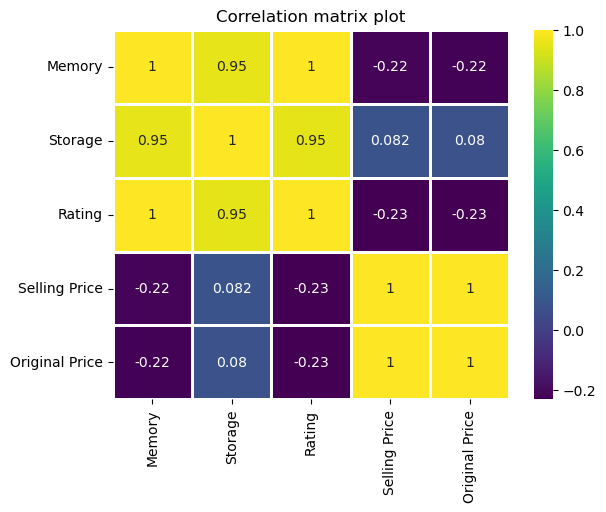

In [67]:
sns.heatmap(corrr, annot=True, cmap='viridis', linewidths = 1)
plt.title("Correlation matrix plot")
plt.show()

### Q. Predict the rating of an Apple Phone

In [68]:
pds = ds[ds["Brand"]=="Apple"]
pds.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
1120,Apple,iPhone SE,White,2.0,64.0,4.5,32999.0,39900.0
1121,Apple,iPhone SE,Black,2.0,64.0,4.5,32999.0,39900.0
1122,Apple,iPhone SE,Red,2.0,64.0,4.5,32999.0,39900.0
1123,Apple,iPhone XR,Red,3.0,64.0,4.6,42999.0,47900.0
1124,Apple,iPhone 12 Mini,Green,4.0,128.0,4.5,61999.0,64900.0


In [69]:
x = pds.drop(["Brand","Rating"], axis=1)
x.head()

,Model,Color,Memory,Storage,Selling Price,Original Price
1120,iPhone SE,White,2.0,64.0,32999.0,39900.0
1121,iPhone SE,Black,2.0,64.0,32999.0,39900.0
1122,iPhone SE,Red,2.0,64.0,32999.0,39900.0
1123,iPhone XR,Red,3.0,64.0,42999.0,47900.0
1124,iPhone 12 Mini,Green,4.0,128.0,61999.0,64900.0


In [70]:
y = pds[["Rating"]]
y.head()

,Rating
1120,4.5
1121,4.5
1122,4.5
1123,4.6
1124,4.5


### Applying transformations


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
attr = ["Model", "Color"]
encoder = OrdinalEncoder()
x.loc[:, attr] = encoder.fit_transform(x.loc[:,attr])

In [72]:
encoder.categories_

[array(['iPhone 11', 'iPhone 11 Pro', 'iPhone 11 Pro Max', 'iPhone 12',
        'iPhone 12 Mini', 'iPhone 12 Pro', 'iPhone 12 Pro Max',
        'iPhone 13', 'iPhone 13 Mini', 'iPhone 13 Pro',
        'iPhone 13 Pro Max', 'iPhone 13 mini', 'iPhone 6', 'iPhone 6 Plus',
        'iPhone 6s', 'iPhone 6s Plus', 'iPhone 7', 'iPhone 7 Plus',
        'iPhone 8', 'iPhone 8 Plus', 'iPhone SE', 'iPhone X', 'iPhone XR',
        'iPhone XS', 'iPhone XS Max'], dtype=object),
 array(['Alpine Green', 'Black', 'Blue', 'Coral', 'Gold', 'Graphite',
        'Green', 'Grey', 'Jet Black', 'Midnight', 'Midnight Green',
        'Pacific Blue', 'Pink', 'Purple', 'Red', 'Rose Gold',
        'Sierra Blue', 'Silver', 'Space Gray', 'Space Grey', 'Starlight',
        'White', 'Yellow'], dtype=object)]

In [73]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 0.95)
x2 = pca.fit_transform(x)

In [74]:
pca.explained_variance_ratio_

array([0.99128901])

### Training the model by applying the Linear Regression


In [75]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x2, y)

LinearRegression()

In [76]:
model = input(print("Enter Model of the iPhone: "))
color = input(print("Enter colour of the iPhone: "))
memory = float(input(print("Enter RAM memory of the iPhone in GB: ")))
storage = float(input(print("Enter storage of the iPhone in GB: ")))
OP = float(input(print("Enter original price of the iPhone: ")))
SP = float(input(print("Enter discounted/selling price of the iPhone: ")))

Enter Model of the iPhone: 


None iPhone SE


Enter colour of the iPhone: 


None White


Enter RAM memory of the iPhone in GB: 


None 2.0


Enter storage of the iPhone in GB: 


None 64.0


Enter original price of the iPhone: 


None 39900.0


Enter discounted/selling price of the iPhone: 


None 32999.0


In [77]:
attrr = list(x)
real = pd.DataFrame(columns = attrr)
inputs = [model,color,memory,storage,OP,SP]
d= dict()
for i ,j in zip(attrr, inputs):
    d[i] = [j]
df = pd.DataFrame(d)
test = pd.concat([real,df], ignore_index = True)

test.loc[:, attr] = encoder.transform(test.loc[:,attr])
test1 = pca.transform(test)

In [78]:
# Define attributes and create an empty DataFrame
attributes = list(x)
real_df = pd.DataFrame(columns=attributes)

# Create input dictionary
inputs = [model, color, memory, storage, OP, SP]
input_dict = dict(zip(attributes, [[value] for value in inputs]))

# Create DataFrame from input dictionary
input_df = pd.DataFrame(input_dict)

# Concatenate the new input data with the real DataFrame
test_df = pd.concat([real_df, input_df], ignore_index=True)

# Encode and transform data
test_df.loc[:,attr] = encoder.transform(test_df.loc[:,attr])
test_transformed = pca.transform(test_df)


### Printing the results



In [79]:
print(f'The configurations of the iPhone is given by:\n 1. Model - {model} \n 2. Color - {color} \n 3. Memory - {memory}GB RAM \n 4. Storage - {storage}GB \n 5. Original Price - {OP} \n 6. Discounted/Selling Price - {SP}')
pred = regressor.predict(test1)
for i in pred:
    for j in i:
        print("The predicted rating for the iPhone is = ", j)

The configurations of the iPhone is given by:
 1. Model - iPhone SE 
 2. Color - White 
 3. Memory - 2.0GB RAM 
 4. Storage - 64.0GB 
 5. Original Price - 39900.0 
 6. Discounted/Selling Price - 32999.0
The predicted rating for the iPhone is =  4.528504568538493


#### Q. Calculate the errors in the prediction


In [80]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = regressor.predict(x2)
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred)

In [81]:
print("The mean squared error in predictions = ", mse)
print("The root mean squared error in predictions = ", rmse)
print("The mean absolute error in predictions = ", mae)

The mean squared error in predictions =  0.01955437577514907
The root mean squared error in predictions =  0.13983696140559215
The mean absolute error in predictions =  0.10963359437633484
